# The Steepest Descent Algorithm

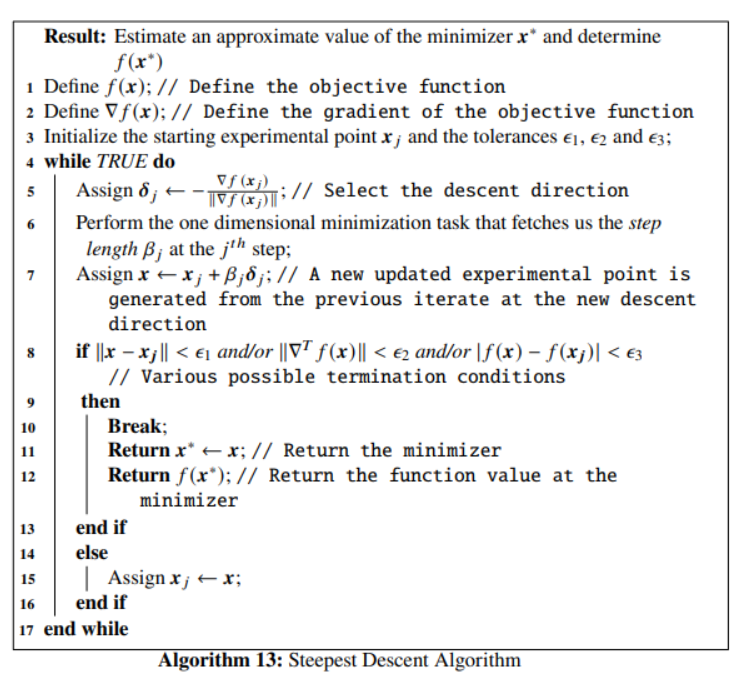

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import autograd.numpy as au
from autograd import grad, jacobian
import scipy
from scipy.optimize import line_search



In [4]:
func = lambda x: (x[0]**2 + x[1] - 11)**2 +(x[0] + x[1]**2 -7)**2 #Himmelblau's
Df= grad(func)
NORM = np.linalg.norm # função de normalização


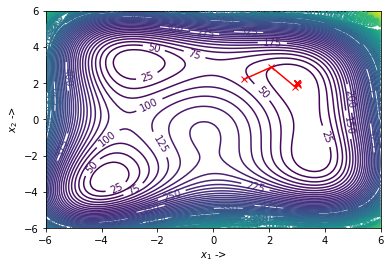

(array([2.99999401, 1.99955698]), 3.39023705451824e-06)

In [18]:
x1 = np.linspace(-6, 6, 100)
x2 = np.linspace(-6, 6, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])

contours=plt.contour(x1, x2, z, 100)
plt.clabel(contours, inline=1, fontsize=10)
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")



In [16]:
def steepest_descent(Xj, tol_1, tol_2, tol_3, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    while True:
        D = Df(Xj)
        delta = - D / NORM(D) # Selection of the direction of the steepest descent
        
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        if NORM(X - Xj) < tol_1 and NORM(Df(X)) < tol_2 or abs(func(X) - func(Xj)) < tol_3:
            x1 += [X[0], ]
            x2 += [X[1], ]
            plt.plot(x1, x2, "rx-", ms=5.5) # Plot the final collected data showing the trajectory of optimization
            plt.show()
            return X, func(X)
        else:
            Xj = X
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]

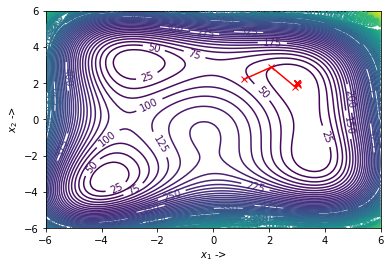

(array([2.99999401, 1.99955698]), 3.39023705451824e-06)

In [19]:
contours=plt.contour(x1, x2, z, 100)
plt.clabel(contours, inline=1, fontsize=10)
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")


steepest_descent(np.array([1.1, 2.2]), 10**-5, 10**-5, 10**-5, 10**-4, 0.212)
